# Polynomial fit scalar

In [15]:
import numpy as np
from tqdm import tqdm
import tensorflow as tf
tf.executing_eagerly()

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus: tf.config.experimental.set_memory_growth(gpus[0], True)

In [16]:
def toy_sin_data():
    x = np.linspace(-3, 3, 50)
    y = 5*np.sin(x) + x + np.random.randn(50) - 1
    return x, y

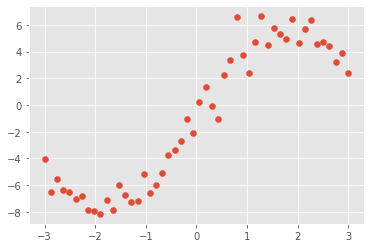

In [17]:
x, y = toy_sin_data()
plt.scatter(x, y)
plt.show()

In [18]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.a1 = tf.Variable(dtype=tf.float32,
                              initial_value=1)
        self.a2 = tf.Variable(dtype=tf.float32,
                              initial_value=-1)
        self.a3 = tf.Variable(dtype=tf.float32,
                              initial_value=1)
        self.b = tf.Variable(dtype=tf.float32,
                             initial_value=2)
  
    def call(self, x):
        return self.b + self.a1*x + self.a2*x**2 + self.a3*x**3

In [25]:
model = Model()

In [26]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

y_init = model(x)

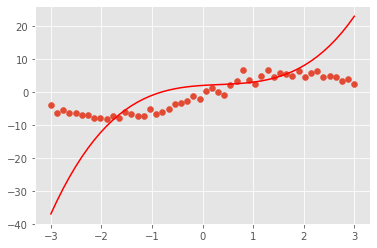

In [27]:
plt.scatter(x, y)
plt.plot(x, y_init, c='r')
plt.show()

In [28]:
def loss_fn(y, y_pre):
    mse = 0.5 * (y - y_pre) ** 2 
    return tf.reduce_sum(mse)

optimizer = tf.keras.optimizers.SGD(1e-4)

In [29]:
reg = []
loss = []
for _ in tqdm(range(1000)):
    
    with tf.GradientTape() as tape:
        y_pre = model(x)
        loss_value = loss_fn(y, y_pre)
    grads = tape.gradient(loss_value, model.variables)

    optimizer.apply_gradients(
        zip(grads, model.variables))

    reg.append((x, y_pre))
    loss.append(loss_value.numpy())

100%|███████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.88it/s]


In [30]:
print(model.a1.numpy())
print(model.a2.numpy())
print(model.a3.numpy())
print(model.b.numpy())

4.9324875
-0.07871326
-0.4129409
-0.5589539


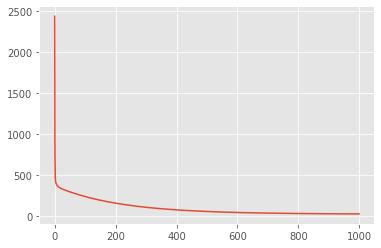

In [31]:
plt.plot(range(1000), loss)
plt.show()

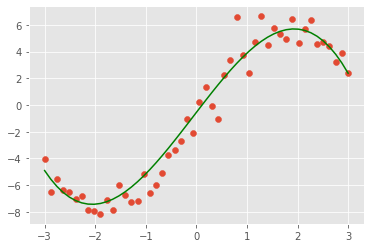

In [32]:
y_predict = model(x)
plt.scatter(x, y)
plt.plot(x, y_predict.numpy(), c="g")